# Лабораторна робота 5

## Винонав студент групи АнД-41
## Шатохін Андрій
## Варіант 13


## Завдання

### Частина 1,2

1. Виконати вирішення задачs класифікації для 3 класів з набору даних [food101](https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip) з використанням різних моделей нейронних мереж:<br>
1.1 CNN модель з лабораторної роботи 4<br>
1.2 [Resnet модель](https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/5)<br>
1.3 [Efficientnet модель](https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1) (моделі 1.1-1.3 з використанням оптимізатора Adam)<br>
1.4 (1.5) Моделі 1.2,1.3 з використанням оптимізатора SGD.<br>
1.6 (1.7) Моделі 1.2,1.3 отримані за допомогою tf.keras.applications та треновані з використанням fine-tuning (останні 10 шарів)<br>


2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за [списком групи](https://docs.google.com/spreadsheets/d/1k6rqaOpWJkmzRzaXXWLZHYwsY4hskfiDkp91yw2BxfQ/edit#gid=0)
3. Порівняти результати моделювання із використанням TensorBoard
4. Графік(и) порівняння результатів завантажити у форматі .svg та  вставити у підсумковий файл поряд із та відповідними висновками
5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab5).
7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
train_path = '../lab_4/data/train'
test_path = '../lab_4/data/test'

In [3]:
IMAGE_SIZE = (224, 224)

In [4]:
img_classes = os.listdir(train_path)
img_classes

['croque_madame', 'ice_cream', 'seaweed_salad']

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
seed = 42

# Set the seed
np.random.seed(seed)
tf.random.set_seed(seed)

### Read data

In [7]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_data_augmented = train_datagen_augmented.flow_from_directory(test_path,
                                                                   target_size=IMAGE_SIZE,
                                                                   batch_size=32,
                                                                   class_mode='categorical')

test_data = test_datagen.flow_from_directory(train_path,
                                             target_size=IMAGE_SIZE,
                                             batch_size=32,
                                             class_mode='categorical')

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [9]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [10]:
import tensorflow_hub as hub
import datetime

In [11]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

### Compare NN 

#### CNN (optimizer Adam) 

In [12]:
tf.random.set_seed(seed)

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,
                          activation='softmax')
])


In [13]:
tf.random.set_seed(seed)

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data_augmented,
                            epochs=40,
                            steps_per_epoch=len(train_data_augmented),
                            validation_data=test_data,
                            validation_steps=len(test_data), 
                            callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="cnn_model")])

Saving TensorBoard log files to: tensorflow_hub/cnn_model/20211202-084753
Epoch 1/40
24/24 [==============================] - 31s 738ms/step - loss: 0.9948 - accuracy: 0.4987 - val_loss: 0.8574 - val_accuracy: 0.5422
Epoch 2/40
24/24 [==============================] - 12s 502ms/step - loss: 0.7510 - accuracy: 0.6200 - val_loss: 0.6896 - val_accuracy: 0.6444
Epoch 3/40
24/24 [==============================] - 12s 496ms/step - loss: 0.6783 - accuracy: 0.6840 - val_loss: 0.7059 - val_accuracy: 0.6933
Epoch 4/40
24/24 [==============================] - 12s 503ms/step - loss: 0.6730 - accuracy: 0.6733 - val_loss: 0.7681 - val_accuracy: 0.6800
Epoch 5/40
24/24 [==============================] - 12s 499ms/step - loss: 0.6395 - accuracy: 0.7160 - val_loss: 0.8005 - val_accuracy: 0.6044
Epoch 6/40
24/24 [==============================] - 12s 503ms/step - loss: 0.6989 - accuracy: 0.6400 - val_loss: 0.7074 - val_accuracy: 0.6267
Epoch 7/40
24/24 [==============================] - 12s 510ms/step -

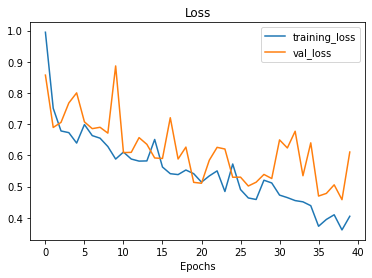

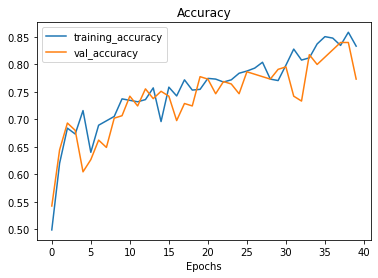

In [14]:
plot_loss_curves(cnn_history)

In [15]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

#### Resnet (optimizer Adam)

In [16]:
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

In [17]:
def create_model(model_url, num_classes=10, input_shape=None):
    
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url,
                       trainable=False,
                       input_shape=input_shape),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model

In [19]:
resnet_model = create_model(resnet_url, num_classes=len(img_classes), input_shape=IMAGE_SIZE+(3,))

AttributeError: module 'tensorflow_hub' has no attribute 'KerasLayer'

In [ ]:
tf.random.set_seed(seed)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

resnet_history = resnet_model.fit(train_data_augmented,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="resnet_v2_50")])

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
resnet_model.summary()

#### EfficientNet (optimizer Adam) 

In [ ]:
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [ ]:
efficientnet_model = create_model(efficientnet_url, num_classes=len(img_classes), input_shape=IMAGE_SIZE+(3,))

In [ ]:
tf.random.set_seed(seed)

# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

efficientnet_history = efficientnet_model.fit(train_data_augmented,
                                              epochs=10,
                                              steps_per_epoch=len(train_data_augmented),
                                              validation_data=test_data,
                                              validation_steps=len(test_data), 
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     experiment_name="efficientnet")])

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_model.summary()

#### Resnet (optimizer SGD)

In [ ]:
tf.random.set_seed(seed)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=['accuracy'])

resnet_sgd_history = resnet_model.fit(train_data_augmented,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="resnet_v2_50_sgd")])

#### EfficientNet (optimizer SGD) 

In [ ]:
tf.random.set_seed(seed)

# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.SGD(),
                           metrics=['accuracy'])

efficientnet_sgd_history = efficientnet_model.fit(train_data_augmented,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_augmented),
                                              validation_data=test_data,
                                              validation_steps=len(test_data), 
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     experiment_name="efficientnet_sgd")])

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs
# rm -rf ./tensorflow_hub/

In [ ]:
%tensorboard --logdir ./tensorflow_hub/

In [ ]:
from IPython.display import SVG

In [ ]:
svg_image_dir = './graphs'

In [ ]:
svg_plots = ['epoch_accuracy.svg', 'epoch_loss.svg', 'evaluation_loss_vs_iterations.svg', 'evaluation_accuracy_vs_iterations.svg']

#### Plots 

##### Epoch accuracy 

In [ ]:
SVG(os.path.join(svg_image_dir, 'epoch_accuracy.svg'))

##### Epoch loss 

In [ ]:
SVG(os.path.join(svg_image_dir, 'epoch_loss.svg'))

##### Evaluation loss vs iterations 

In [ ]:
SVG(os.path.join(svg_image_dir, 'evaluation_loss_vs_iterations.svg'))

##### Evaluation accuracy vs iterations 

In [ ]:
SVG(os.path.join(svg_image_dir, 'evaluation_accuracy_vs_iterations.svg'))

1.6 (1.7) Моделі 1.2,1.3 отримані за допомогою tf.keras.applications та треновані з використанням fine-tuning (останні 10 шарів)

In [26]:
def model_trainable_layers(model):
    for layer_number, layer in enumerate(model.layers):
        print(layer_number, layer.name, layer.trainable, len(layer.trainable_variables))

#### Resnet + fine-tuning

In [63]:
resnet_tunable = tf.keras.applications.ResNet50V2(include_top=False,
                                     weights='imagenet',
                                     input_shape=IMAGE_SIZE + (3,),
                                     pooling='max',
                                     classes=len(img_classes),
                                     classifier_activation='softmax'
                                    )

# Fine-tuning last 10 layers
resnet_tunable.trainable = False

for layer in resnet_tunable.layers[-10:]:
    layer.trainable = True

print(model_trainable_layers(resnet_tunable))


0 input_21 False 0
1 conv1_pad False 0
2 conv1_conv False 0
3 pool1_pad False 0
4 pool1_pool False 0
5 conv2_block1_preact_bn False 0
6 conv2_block1_preact_relu False 0
7 conv2_block1_1_conv False 0
8 conv2_block1_1_bn False 0
9 conv2_block1_1_relu False 0
10 conv2_block1_2_pad False 0
11 conv2_block1_2_conv False 0
12 conv2_block1_2_bn False 0
13 conv2_block1_2_relu False 0
14 conv2_block1_0_conv False 0
15 conv2_block1_3_conv False 0
16 conv2_block1_out False 0
17 conv2_block2_preact_bn False 0
18 conv2_block2_preact_relu False 0
19 conv2_block2_1_conv False 0
20 conv2_block2_1_bn False 0
21 conv2_block2_1_relu False 0
22 conv2_block2_2_pad False 0
23 conv2_block2_2_conv False 0
24 conv2_block2_2_bn False 0
25 conv2_block2_2_relu False 0
26 conv2_block2_3_conv False 0
27 conv2_block2_out False 0
28 conv2_block3_preact_bn False 0
29 conv2_block3_preact_relu False 0
30 conv2_block3_1_conv False 0
31 conv2_block3_1_bn False 0
32 conv2_block3_1_relu False 0
33 conv2_block3_2_pad False 0


In [64]:
resnet_fine_tuning_model = tf.keras.Sequential([
    resnet_tunable,
    tf.keras.layers.Dense(3, activation='softmax')
])

tf.random.set_seed(seed)

# Compile
resnet_fine_tuning_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

resnet_fine_tuning_model_history = resnet_fine_tuning_model.fit(train_data_augmented,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="resnet_v2_50_fine_tuning")])

Saving TensorBoard log files to: tensorflow_hub/resnet_v2_50_fine_tuning/20211202-095319


D:\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/5
24/24 [==============================] - 31s 1s/step - loss: 2.5182 - accuracy: 0.6253 - val_loss: 1.9818 - val_accuracy: 0.7467
Epoch 2/5
24/24 [==============================] - 24s 967ms/step - loss: 0.9330 - accuracy: 0.8507 - val_loss: 0.7721 - val_accuracy: 0.8933
Epoch 3/5
24/24 [==============================] - 24s 987ms/step - loss: 0.8046 - accuracy: 0.8693 - val_loss: 0.7331 - val_accuracy: 0.8933
Epoch 4/5
24/24 [==============================] - 25s 1s/step - loss: 0.6199 - accuracy: 0.9040 - val_loss: 0.8664 - val_accuracy: 0.8533
Epoch 5/5
24/24 [==============================] - 24s 994ms/step - loss: 0.6484 - accuracy: 0.8880 - val_loss: 0.6916 - val_accuracy: 0.8756


#### EfficientNet + Fine-tuning 

In [61]:
efficient_net_tunable = tf.keras.applications.EfficientNetB0(include_top=False, 
                                         weights='imagenet',
                                         input_shape=IMAGE_SIZE + (3,),
                                         pooling='max',
                                         classes=len(img_classes),
                                         classifier_activation='softmax'
                                        )

# Fine-tuning last 10 layers
efficient_net_tunable.trainable = False

for layer in efficient_net_tunable.layers[-10:]:
    layer.trainable = True

print(model_trainable_layers(efficient_net_tunable))

0 input_20 False 0
1 rescaling_16 False 0
2 normalization_16 False 0
3 stem_conv_pad False 0
4 stem_conv False 0
5 stem_bn False 0
6 stem_activation False 0
7 block1a_dwconv False 0
8 block1a_bn False 0
9 block1a_activation False 0
10 block1a_se_squeeze False 0
11 block1a_se_reshape False 0
12 block1a_se_reduce False 0
13 block1a_se_expand False 0
14 block1a_se_excite False 0
15 block1a_project_conv False 0
16 block1a_project_bn False 0
17 block2a_expand_conv False 0
18 block2a_expand_bn False 0
19 block2a_expand_activation False 0
20 block2a_dwconv_pad False 0
21 block2a_dwconv False 0
22 block2a_bn False 0
23 block2a_activation False 0
24 block2a_se_squeeze False 0
25 block2a_se_reshape False 0
26 block2a_se_reduce False 0
27 block2a_se_expand False 0
28 block2a_se_excite False 0
29 block2a_project_conv False 0
30 block2a_project_bn False 0
31 block2b_expand_conv False 0
32 block2b_expand_bn False 0
33 block2b_expand_activation False 0
34 block2b_dwconv False 0
35 block2b_bn False 0


In [62]:
efficientnet_fine_tuning_model = tf.keras.Sequential([
    efficient_net_tunable,
    tf.keras.layers.Dense(3, activation='softmax')
])

tf.random.set_seed(seed)

# Compile
efficientnet_fine_tuning_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

efficientnet_fine_tuning_model_history = efficientnet_fine_tuning_model.fit(train_data_augmented,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="efficientnet_fine_tuning_model")])

Saving TensorBoard log files to: tensorflow_hub/efficientnet_fine_tuning_model/20211202-095015
Epoch 1/5
24/24 [==============================] - 36s 1s/step - loss: 2.9459 - accuracy: 0.3333 - val_loss: 1.5084 - val_accuracy: 0.3333
Epoch 2/5
24/24 [==============================] - 23s 957ms/step - loss: 1.6778 - accuracy: 0.3253 - val_loss: 1.1011 - val_accuracy: 0.3333
Epoch 3/5
24/24 [==============================] - 24s 974ms/step - loss: 1.5818 - accuracy: 0.3413 - val_loss: 1.6760 - val_accuracy: 0.3333
Epoch 4/5
24/24 [==============================] - 23s 971ms/step - loss: 1.4125 - accuracy: 0.3453 - val_loss: 1.8255 - val_accuracy: 0.3333
Epoch 5/5
24/24 [==============================] - 24s 996ms/step - loss: 1.6265 - accuracy: 0.3493 - val_loss: 2.4113 - val_accuracy: 0.3333


#### Висновок

Отже, на даній лабораторній роботі я виконав класифікацію для 3 класів ('croque_madame', 'ice_cream', 'seaweed_salad') за допомогою декількоїх варіацій моделей:
1. CNN модель з попередньої лабораторної роботи, яка видала точність 80% за 40 епох
2. Натренована Resnet модель із використанням Adam оптимізатора, яка видала точність 93% за 5 епохах
3. Натренована EfficientNet модель із використання Adam оптимізатора, яка видала точність 97% за 5 епох
4. Натренована Resnet модель із використанням SGD оптимізатора, яка видала точність 92% за 5 епох
5. Натренована EfficientNet модель із використання SGD оптимізатора, яка видала точність 98% за 5 епох
6. Натренована Resnet модель із донавчанням останніх 10 шарів, яка видала точність 87% за 5 епох
7. Натренована EfficientNet модель із донавчанням останніх 10 шарів, яка видала яка видала точність 33% за 5 епох


Використання натренованих мереж для сміжних задач досить швидко дає змогу отримувати задовільні результати, а можливість налаштувати певні шари під свою конкретну задачу робить їх універсальними.